In [6]:
from autogluon.multimodal import MultiModalPredictor
import os
import time

def predict(img_path, predictor = None, model_path=f"./model"):
    if predictor is None:
        predictor = MultiModalPredictor.load(model_path)
        predictor.set_num_gpus(1)
    predictions = predictor.predict({'image': [img_path]})
    predictions = predictions.iloc[0]
    from autogluon.multimodal.utils import ObjectDetectionVisualizer
    visualizer = ObjectDetectionVisualizer(img_path) 
    out = visualizer.draw_instance_predictions(predictions, conf_threshold=0.4)
    visualized = out.get_image() 
    from PIL import Image
    from IPython.display import Image, display
    pil_img = Image(filename=img_path)
    display(pil_img)
    from PIL import Image
    img = Image.fromarray(visualized, 'RGB')
    display(img)

Load pretrained checkpoint: e:\code\python\dental\model\model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

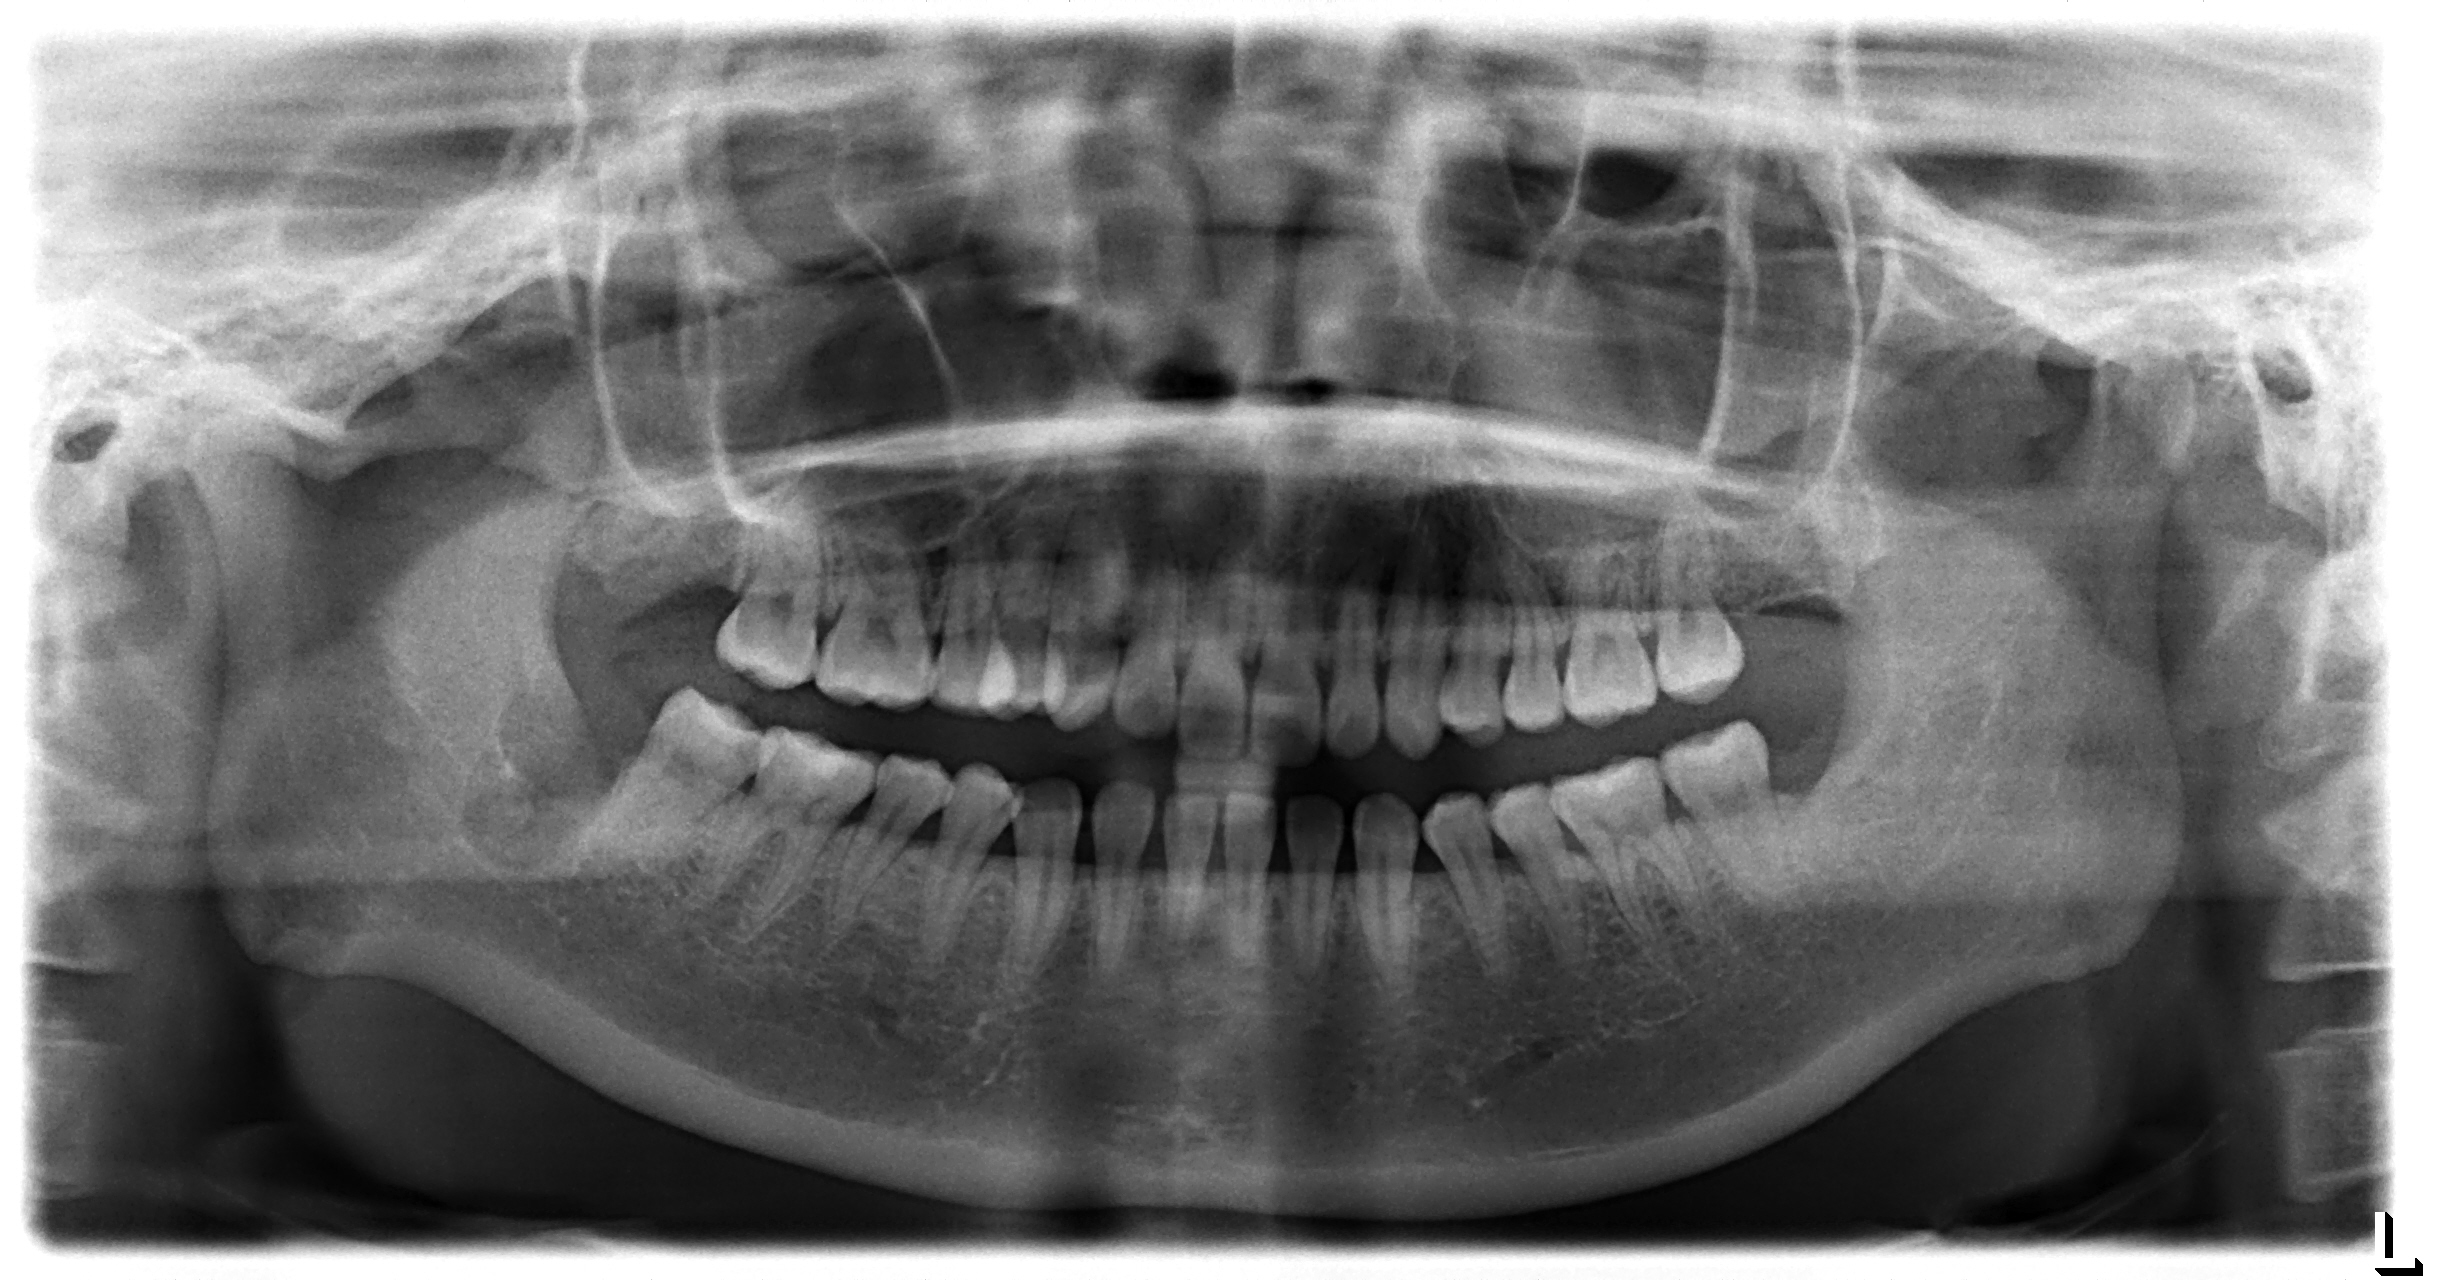

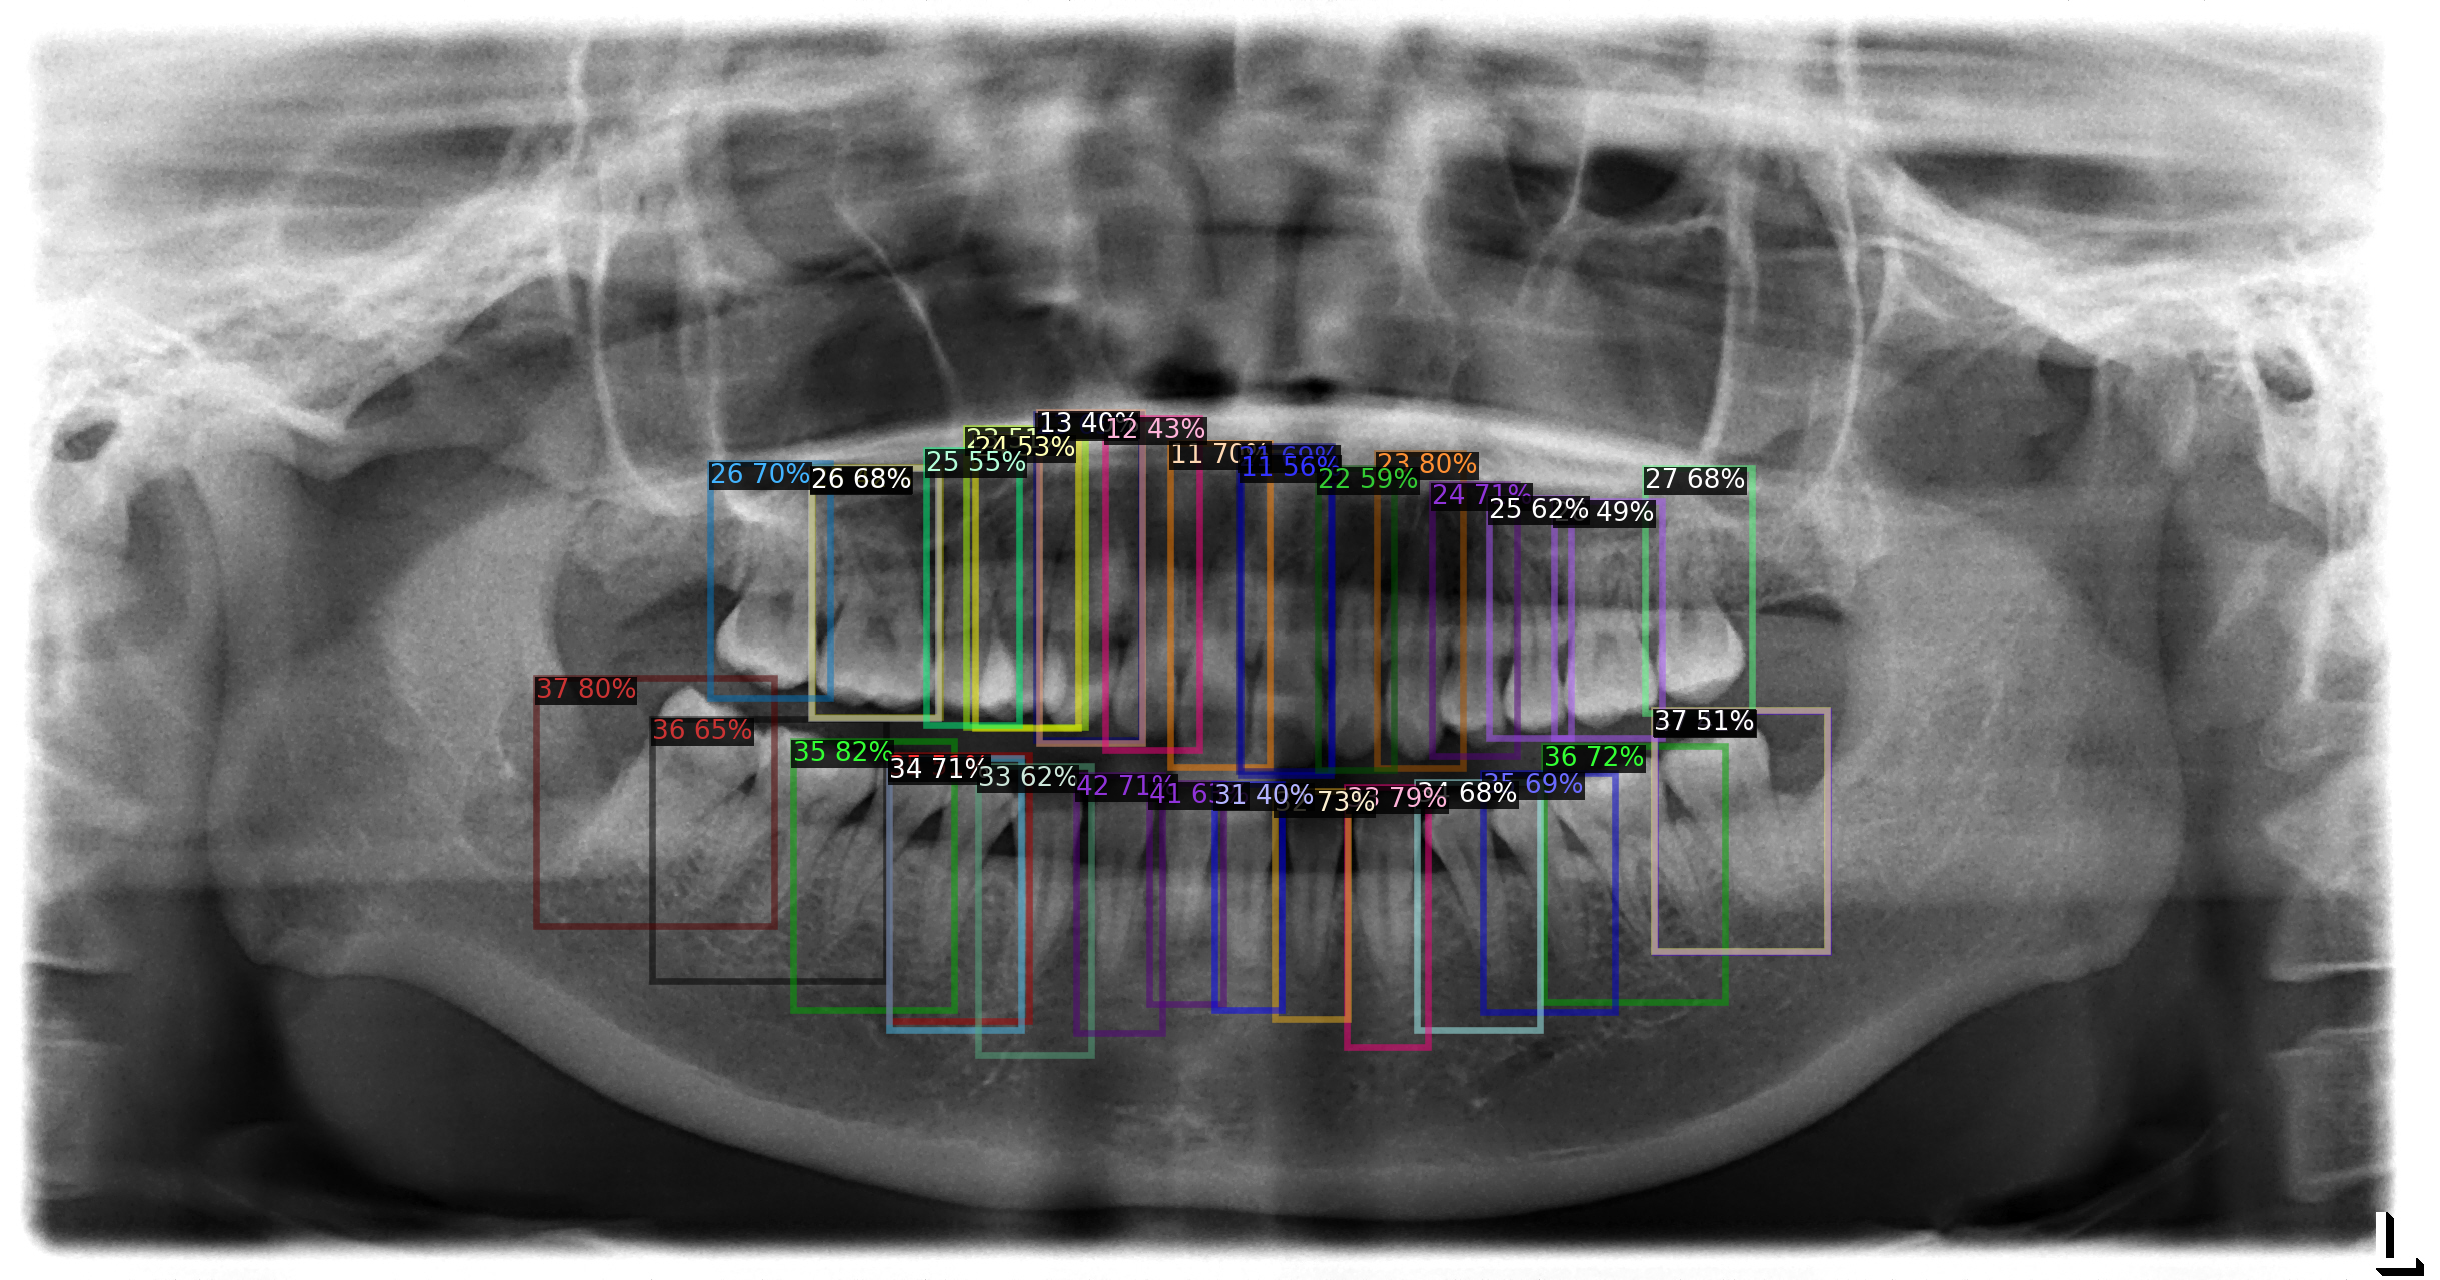

In [7]:
img_path = os.path.join('test_data','________________0_19890203_382882104_0.jpg')
predict(img_path)

In [8]:
train_path = os.path.join('data','dentex','training_data','quadrant-enumeration','coco', 'train-quadrant-enumeration-coco.json')

import json, io
x = json.load(io.open(train_path, 'r'))


In [10]:
len(x['images'])

634